In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

sns.set_style('darkgrid')
plt.rcParams['scatter.edgecolors'] = 'none'
plt.rcParams['patch.edgecolor'] = 'none'

# 1. Преварительный просмотр данных

In [61]:
data_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'dataset/rent.csv')

df = pd.read_csv(data_path, sep=';')

In [62]:
df.head(10)

,rent,s,floor,rooms,district,walls,furniture
0,15000,35.0,5,1,3,1,1
1,16500,31.0,2,1,2,0,1
2,18000,30.0,4,1,3,1,1
3,30000,55.0,1,2,3,1,1
4,12000,19.0,3,1,2,1,1
5,18000,45.0,7,1,2,0,1
6,22500,65.0,4,2,3,1,1
7,13500,20.0,2,1,2,0,1
8,28500,50.0,4,1,1,1,1
9,11250,15.0,1,1,2,0,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       130 non-null    int64  
 1   s          130 non-null    float64
 2   floor      130 non-null    int64  
 3   rooms      130 non-null    int64  
 4   district   130 non-null    int64  
 5   walls      130 non-null    int64  
 6   furniture  130 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.2 KB


Имеем заранее очищенные данные с числовыми признаками

# 2. Предварительная обработка данных

Проведем визуальный анализ распределений признаков

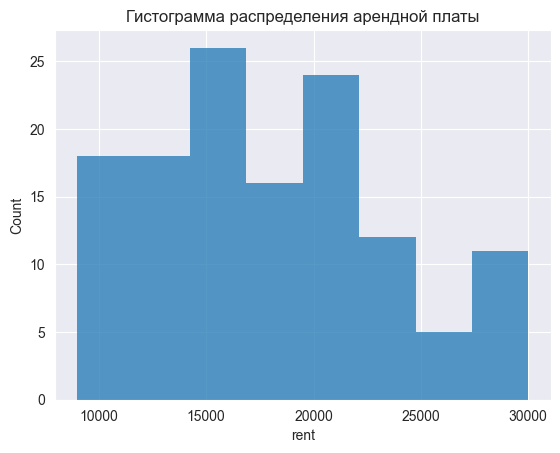

In [64]:
sns.histplot(df['rent'], bins=8)
plt.title('Гистограмма распределения арендной платы')
plt.show()

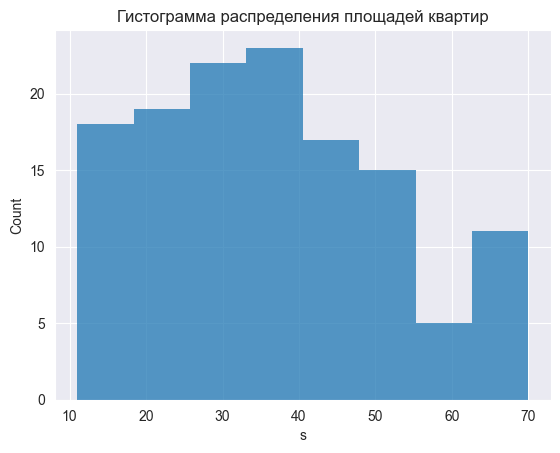

In [65]:
sns.histplot(df['s'], bins=8)
plt.title('Гистограмма распределения площадей квартир')
plt.show()

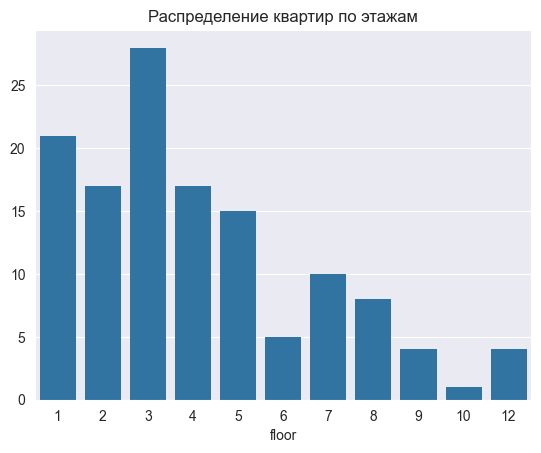

In [66]:
floors = df['floor'].value_counts().sort_index()

sns.barplot(x=floors.index, y=floors.values)
plt.title('Распределение квартир по этажам')
plt.show()

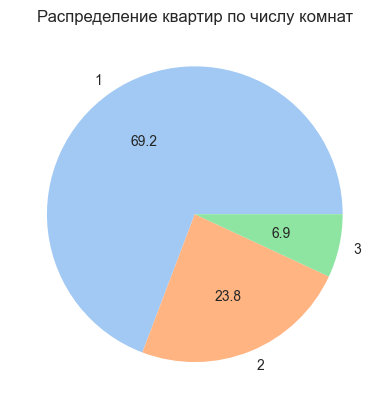

In [71]:
rooms = df['rooms'].value_counts().sort_index()

plt.pie(x=rooms.values, labels=rooms.index, autopct='%.1f', colors=sns.color_palette('pastel', len(rooms)))
plt.title('Распределение квартир по числу комнат')
plt.show()

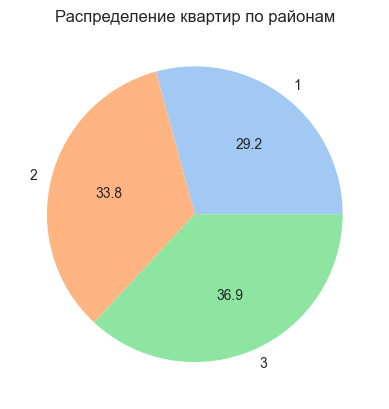

In [72]:
walls = df['district'].value_counts().sort_index()

plt.pie(x=walls.values, labels=walls.index, autopct='%.1f', colors=sns.color_palette('pastel', len(walls)))
plt.title('Распределение квартир по районам')
plt.show()

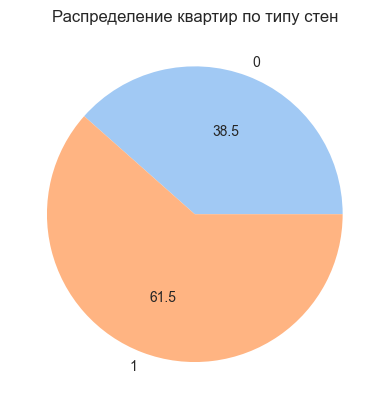

In [74]:
walls = df['walls'].value_counts().sort_index()

plt.pie(x=walls.values, labels=walls.index, autopct='%.1f', colors=sns.color_palette('pastel', len(walls)))
plt.title('Распределение квартир по типу стен')
plt.show()

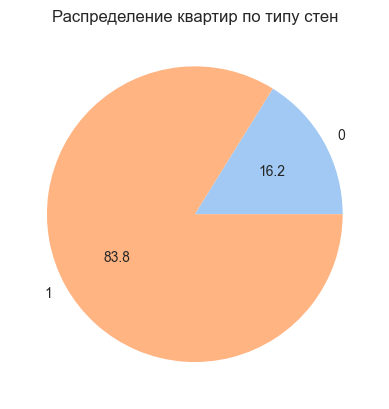

In [75]:
furnitures = df['furniture'].value_counts().sort_index()

plt.pie(x=furnitures.values, labels=furnitures.index, autopct='%.1f', colors=sns.color_palette('pastel', len(furnitures)))
plt.title('Распределение квартир по типу стен')
plt.show()

## Описательные статистики

In [79]:
df[['floor', 'walls', 'district', 's', 'rent']].describe()

,floor,walls,district,s,rent
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,4.153846,0.615385,2.076923,36.439231,17890.384615
std,2.680569,0.488386,0.812837,15.753831,5608.686840
min,1.000000,0.000000,1.000000,11.000000,9000.000000
25%,2.000000,0.000000,1.000000,21.250000,13500.000000
50%,3.000000,1.000000,2.000000,36.000000,18000.000000
75%,5.000000,1.000000,3.000000,45.000000,21000.000000
max,12.000000,1.000000,3.000000,70.000000,30000.000000


Проверим на ассиметрию непрерывные признаки

In [80]:
df[['rent', 's']].skew()

rent    0.536873
s       0.328439
dtype: float64

Имеем небольшие правые хвосты, в целом - почти симметричное распределение

Проверим на эксцесс

In [81]:
df[['rent', 's']].kurtosis()

rent   -0.350727
s      -0.706654
dtype: float64

Оба распределения можно считать близкими к нормальному, но более плоскими, особенно что касается площади

## Проверка на нормальность

Выборка маленькая, поэтому используем критерий Шапиро-Уилка, гипотеза $H_0$ - что распределение нормальное

In [84]:
alpha = 0.05

p_val = stats.shapiro(df['rent'])[1]
print(f'Распределение "rent" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

p_val = stats.shapiro(df['s'])[1]
print(f'Распределение "s" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

Распределение "rent" - не нормальное (p_value = 9.6e-05)
Распределение "s" - не нормальное (p_value = 8.2e-04)
